In [1]:
from utils.binaries import *
from utils.plotting import *
from utils.auger.sd.histo import SdHisto
from utils.auger.sd.monit import Monit

17:33:28 (+1751.4s) [INFO   ] -- import logging


17:33:28 (  +116ms) [INFO   ] -- import numpy as np
17:33:28 (    +5ms) [INFO   ] -- import uncertainties
17:33:28 (    +5ms) [INFO   ] -- import uncertainties
17:33:28 (  +254ms) [INFO   ] -- import pandas as pd
17:33:28 (    +0ms) [WARNING] -- pandas support to be dropped at some point!
17:33:28 (    +1ms) [INFO   ] -- import binaries.tools as tools
17:33:29 (  +301ms) [INFO   ] -- import matplotlib.pyplot as plt
17:33:29 (  +501ms) [INFO   ] -- import seaborn as so
17:33:29 (    +2ms) [INFO   ] -- set MONI_PATH = PosixPath('/home/filip/Data/monit_and_sd')
17:33:29 (    +0ms) [INFO   ] -- set HIST_PATH = PosixPath('/home/filip/Data/monit_and_sd')
17:33:29 (    +0ms) [INFO   ] -- set PLOT_PATH = PosixPath('/home/filip/Data/plots')
17:33:29 (    +1ms) [INFO   ] -- set DATA_PATH = PosixPath('/home/filip/Data')
17:33:29 (    +0ms) [INFO   ] -- set SCAN_PATH = PosixPath('/home/filip/Public/xy-calibration')
17:33:29 (    +0ms) [INFO   ] -- set OFLN_PATH = PosixPath('/home/filip/Public/offl

(0) ALL FILES BELOW
(1) mc_2025_02_11_17h32.root
(2) mc_2025_02_11_00h01.root



17:17:15 (  +15.5s) [INFO   ] -- received 3 file(s) as input
17:17:15 (  +152ms) [INFO   ] -- View monit keys with self.keys()
17:17:15 (  +344ms) [INFO   ] -- found 399 entries for key fTime and station #943
17:17:15 (    +9ms) [INFO   ] -- found 399 entries for key f70HzRate and station #943
17:17:15 (   +20ms) [INFO   ] -- found 399 entries for key fPeak and station #943
17:17:15 (   +24ms) [INFO   ] -- found 399 entries for key fTime and station #944
17:17:15 (    +9ms) [INFO   ] -- found 399 entries for key f70HzRate and station #944
17:17:15 (   +19ms) [INFO   ] -- found 399 entries for key fPeak and station #944
17:17:15 (   +28ms) [INFO   ] -- found 397 entries for key fTime and station #949
17:17:15 (    +7ms) [INFO   ] -- found 397 entries for key f70HzRate and station #949
17:17:15 (   +19ms) [INFO   ] -- found 397 entries for key fPeak and station #949
17:17:15 (   +27ms) [INFO   ] -- found 399 entries for key fTime and station #954
17:17:15 (    +7ms) [INFO   ] -- found 39

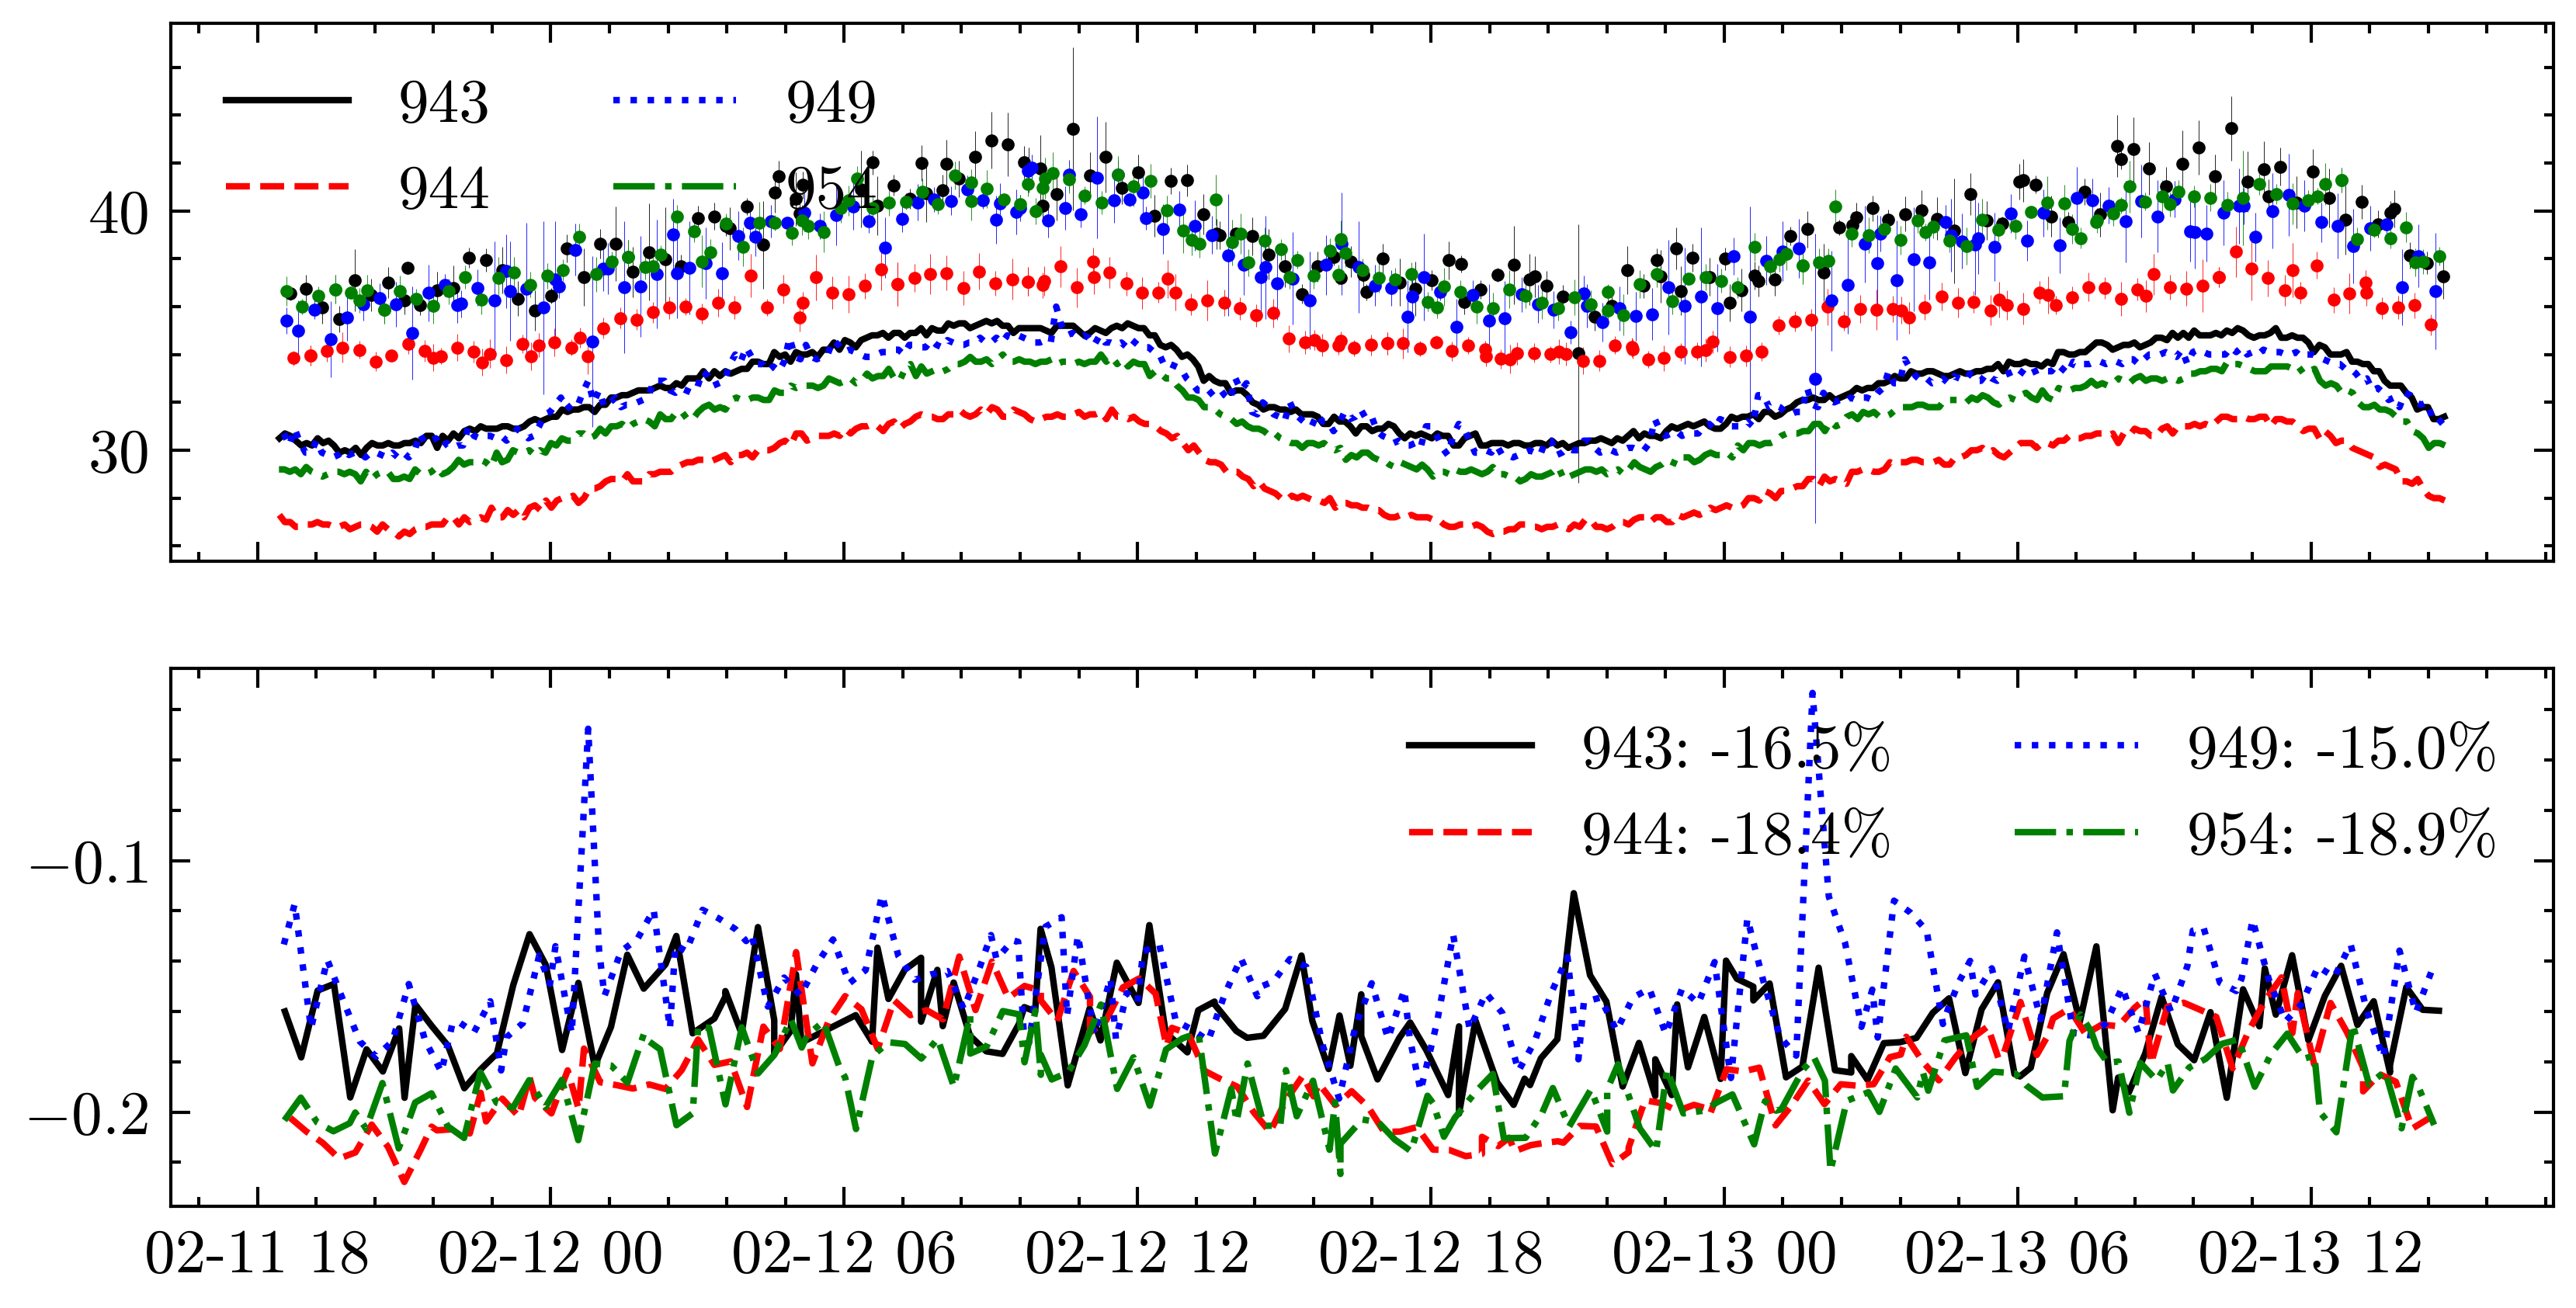

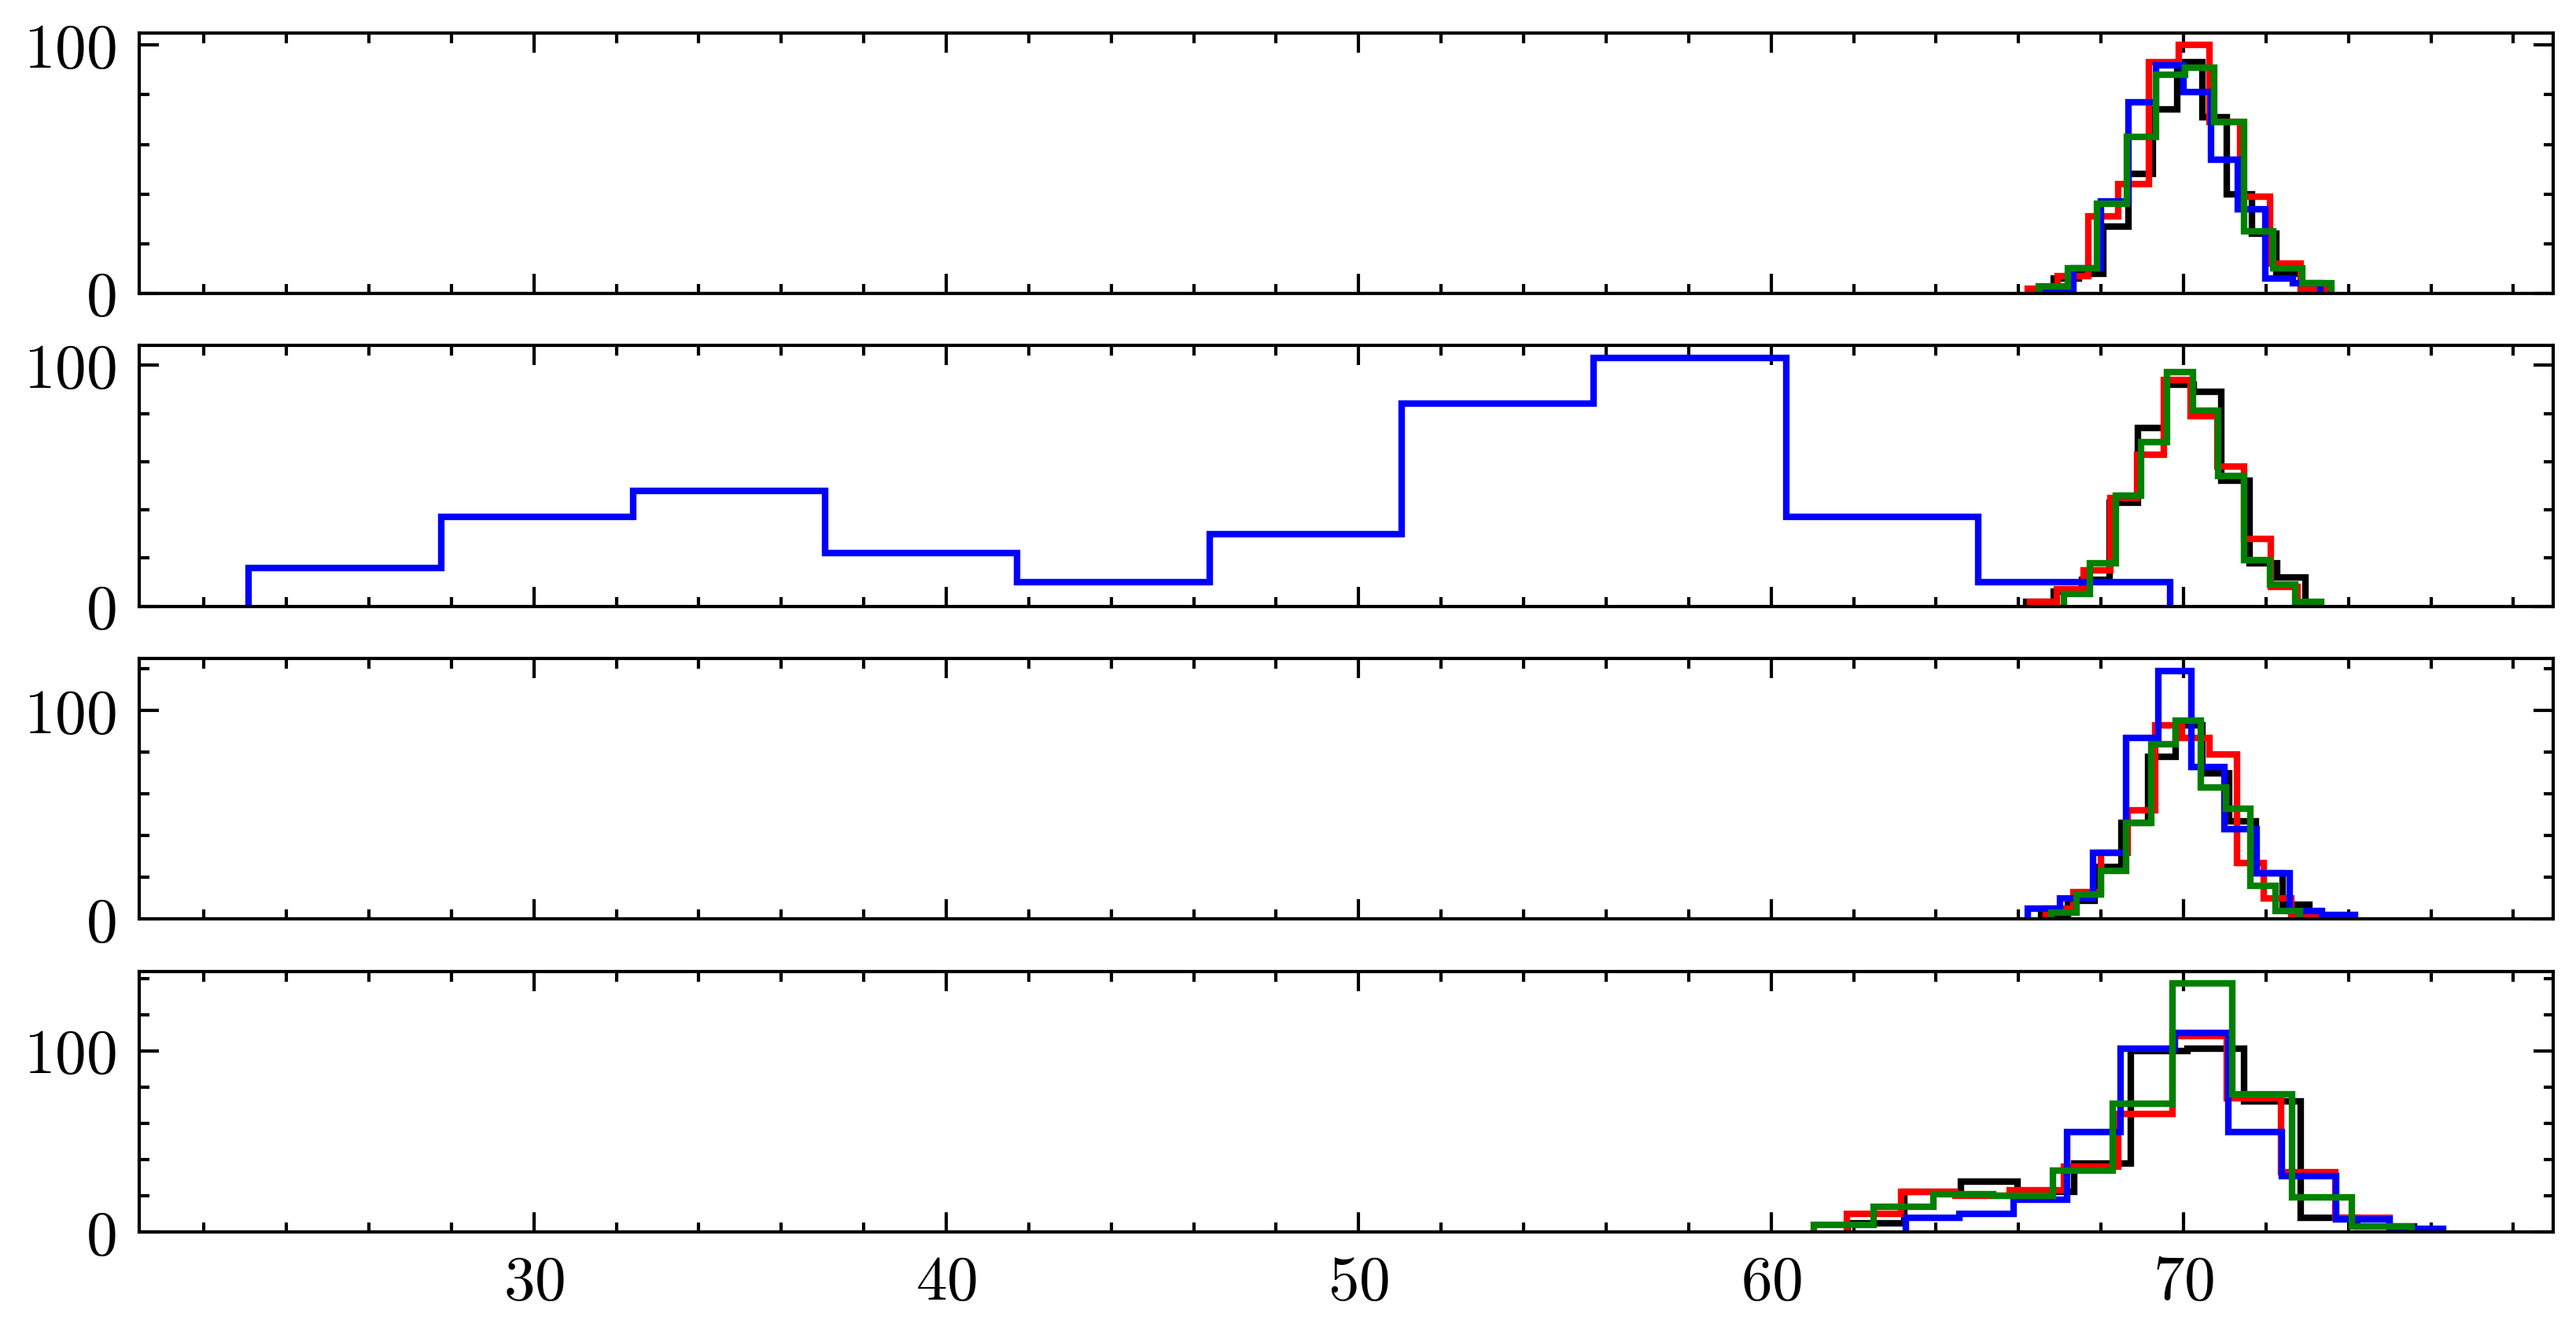

In [ ]:
# offline calib
histos = np.loadtxt('peak1.txt')
histos = np.split(histos, len(histos)//4)

peak_times = {
        943: [],
        944: [],
        949: [],
        954: [],
        }

peak_values = {
        943: [],
        944: [],
        949: [],
        954: [],
        }

for i, histo in enumerate(histos):
    station_id = int(histo[:, 0][0])
    daq_time   = histo[:, 1][0]
    timestamp  = int(histo[:, 2][0])
    tube_mask  = histo[:, 3][0]
    iPMT = histo[:, 4]

    if station_id in [945, 972, 948]: continue

    PeakHisto = SdHisto(peak=histo[:, 5:], pmt_mask=[0,0,0,1])
    peak_charge = PeakHisto()
    
    peak_values[station_id].append(peak_charge['peak'][-1])
    peak_times[station_id].append(timestamp)

# monit and plotting results
monit = Monit(2025, 2, range(11,14))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig, axes = plt.subplots(4, 1, sharex=True)
colors = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for station in [943, 944, 949, 954]:
    
    c = next(colors)

    time = monit('fTime', station)
    rate = monit('f70HzRate', station)
    mip = monit('fPeak', station)[:, -1]

    ax1.plot(plot.to_datetime(time), mip, marker='none', label=station, c=c)
#     ax2.plot(time, rate[:, -1], marker='none', c=c)                   # rate information

    ax1.errorbar(plot.to_datetime(peak_times[station]), [x.n for x in peak_values[station]], 
                 yerr=[x.std_dev for x in peak_values[station]],
                 ls='none', fmt='o', markersize=1, c=c, lw=0.1)
    # ax2.plot(time[15:-14], np.convolve(rate[:, -1], np.ones(30)/30, mode='valid') , marker='none')
    
    min_index = [np.argmin(np.abs(t - time)) for t in peak_times[station]]
    histo_mip = np.array([x.n for x in peak_values[station]])
    diff = (mip[min_index] - histo_mip) / histo_mip

    # 1000s between events w/ running mean over 86 events = 23.89 hours
    # ax2.plot(to_dt(time[min_index])[43:-42], 
    #          np.convolve(diff, np.ones(86)/86, mode='valid'), 
    #          color=c, label=f"{_id}: {np.nanmean(diff)*100:+.1f}%", 
    #          marker='none')

    _sort = np.argsort(min_index)
    ax2.plot(plot.to_datetime(time[min_index][_sort]), diff[_sort], label=f"{station}: {np.nanmean(diff)*100:+.1f}%", marker='none', c=c)

    for i in range(4):
        axes[i].hist(rate[:, i], histtype='step')

ax1.legend(ncol=2)
ax2.legend(ncol=2)

# 70 Hz Rate - 2.64 scaling factor

SSD SdHisto fit failed: large fit error for SSD: 126%
(0) ALL FILES BELOW
(1) mc_2025_02_13_00h01.root
(2) mc_2025_02_13_17h14.root
(3) mc_2025_02_13_18h18.root
(4) mc_2025_02_13_14h08.root



17:34:58 (  +68.9s) [INFO   ] -- received 5 file(s) as input
17:34:58 (  +365ms) [INFO   ] -- View monit keys with self.keys()
17:34:58 (   +30ms) [INFO   ] -- found 835 entries for key fTime and station #943
17:34:58 (   +16ms) [INFO   ] -- found 835 entries for key f70HzRate and station #943
17:34:58 (   +33ms) [INFO   ] -- found 835 entries for key fPeak and station #943
17:34:58 (   +33ms) [INFO   ] -- found 834 entries for key fTime and station #944
17:34:58 (   +11ms) [INFO   ] -- found 834 entries for key f70HzRate and station #944
17:34:58 (   +31ms) [INFO   ] -- found 834 entries for key fPeak and station #944
17:34:58 (   +37ms) [INFO   ] -- found 836 entries for key fTime and station #949
17:34:58 (   +12ms) [INFO   ] -- found 836 entries for key f70HzRate and station #949
17:34:58 (   +29ms) [INFO   ] -- found 836 entries for key fPeak and station #949
17:34:58 (   +35ms) [INFO   ] -- found 834 entries for key fTime and station #954
17:34:58 (   +11ms) [INFO   ] -- found 83

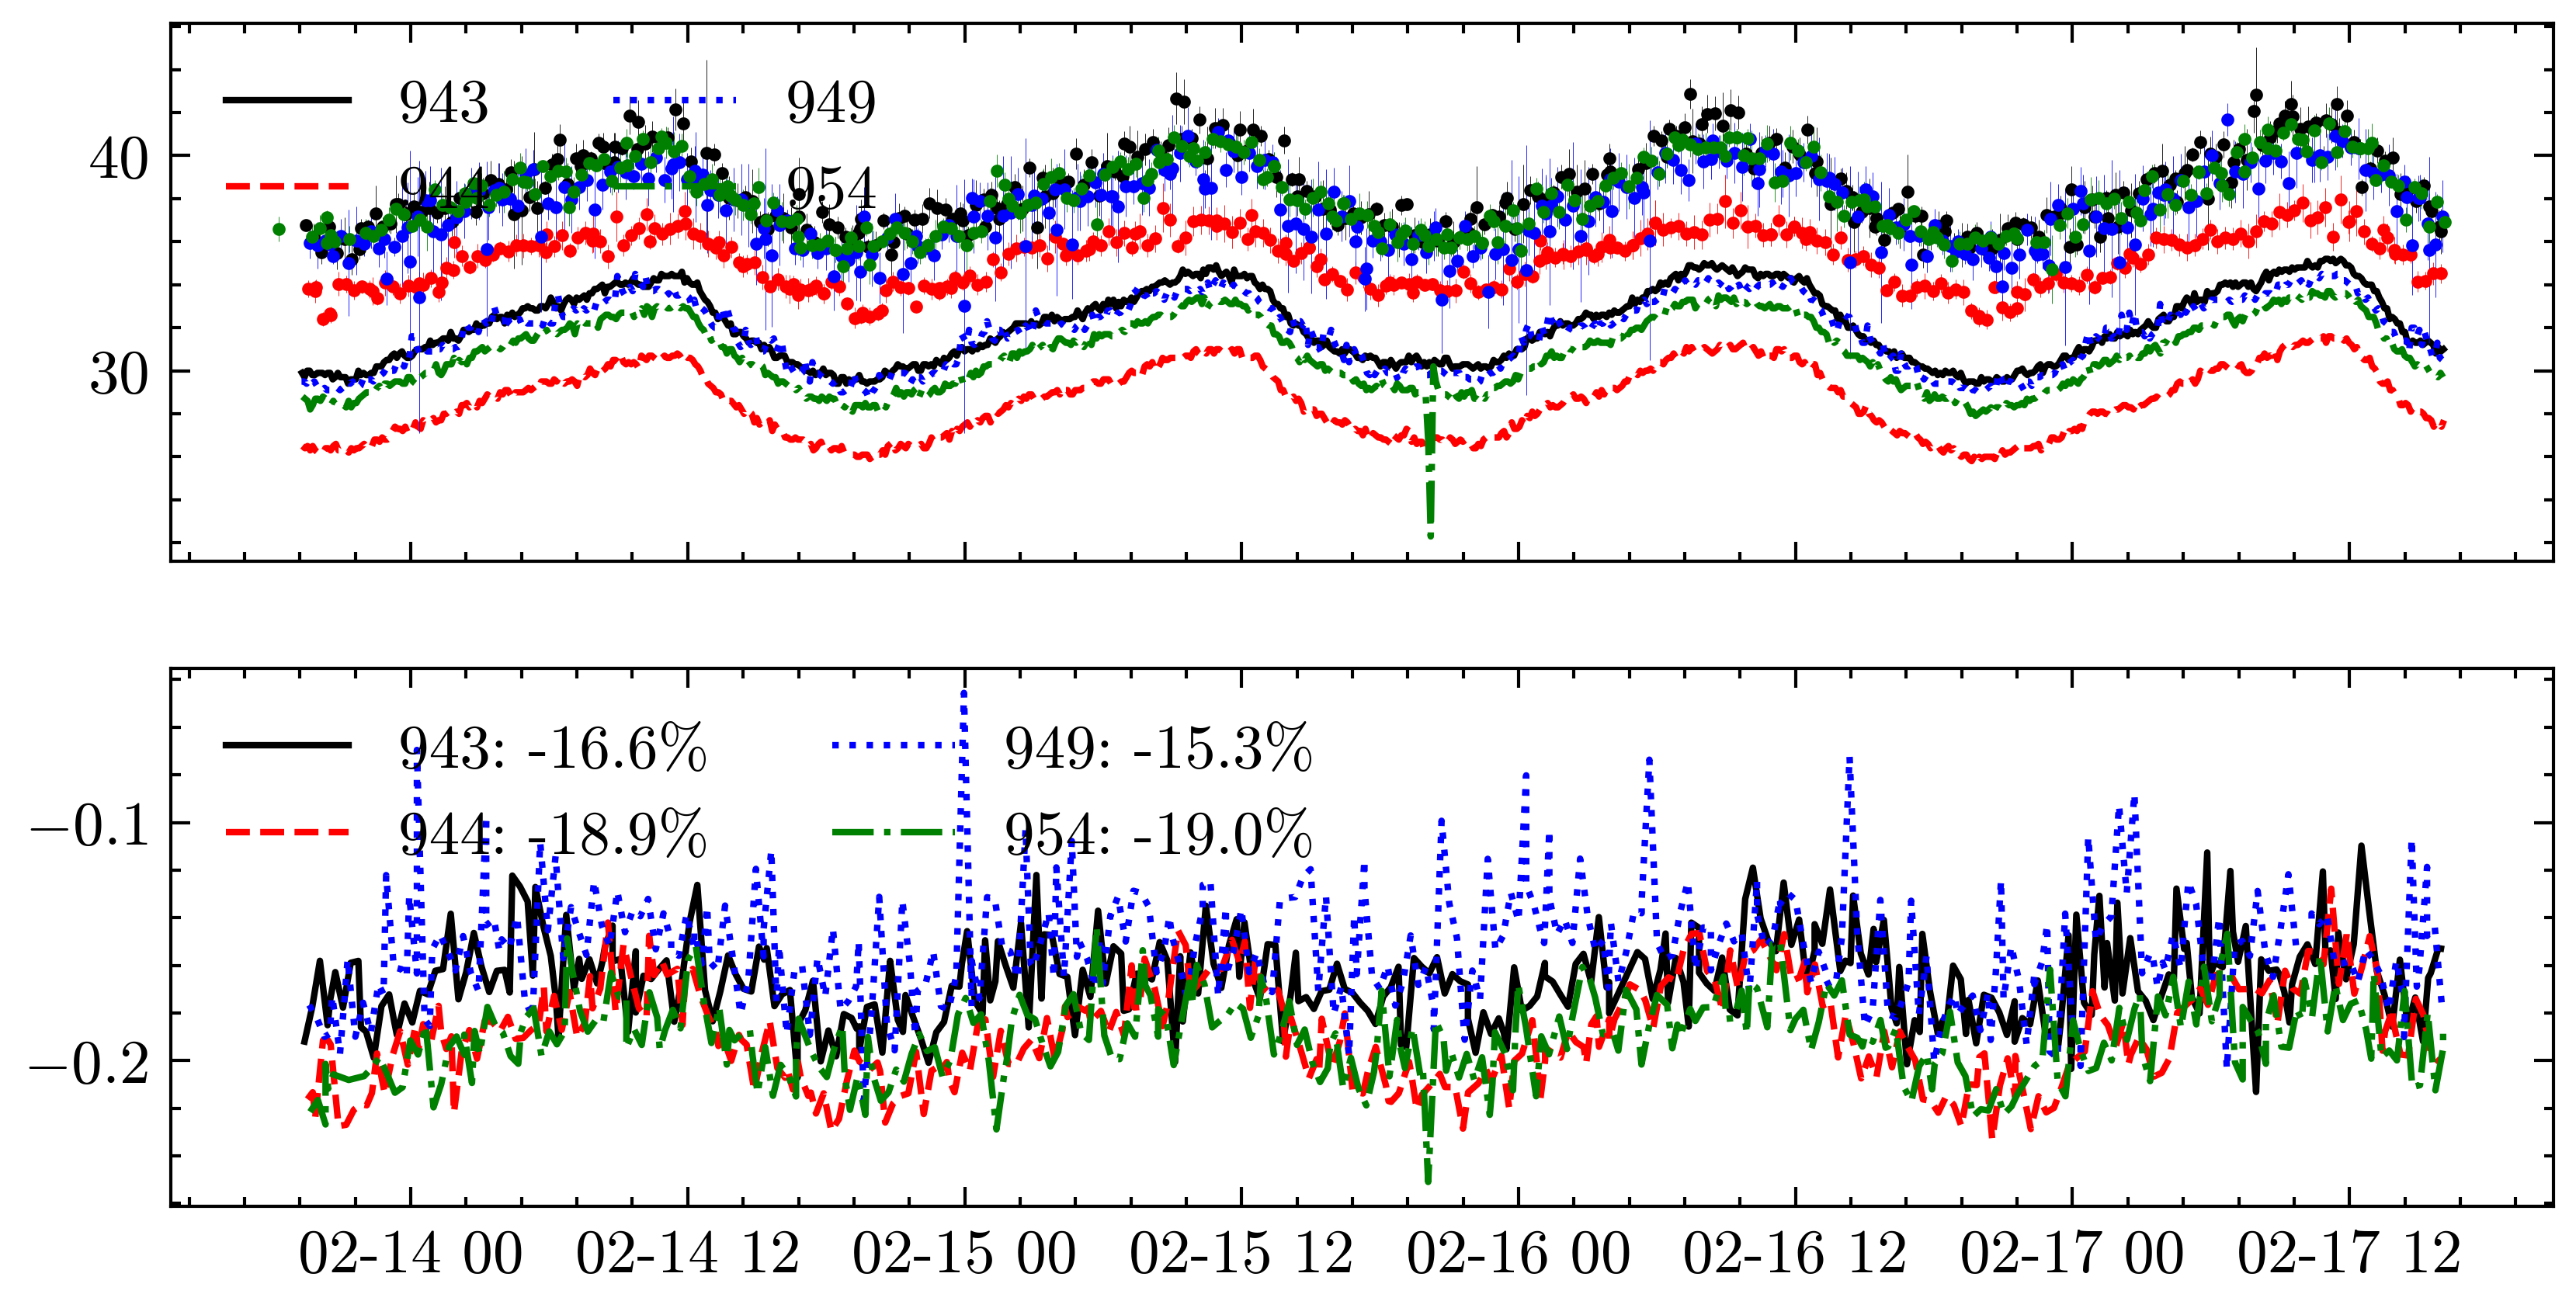

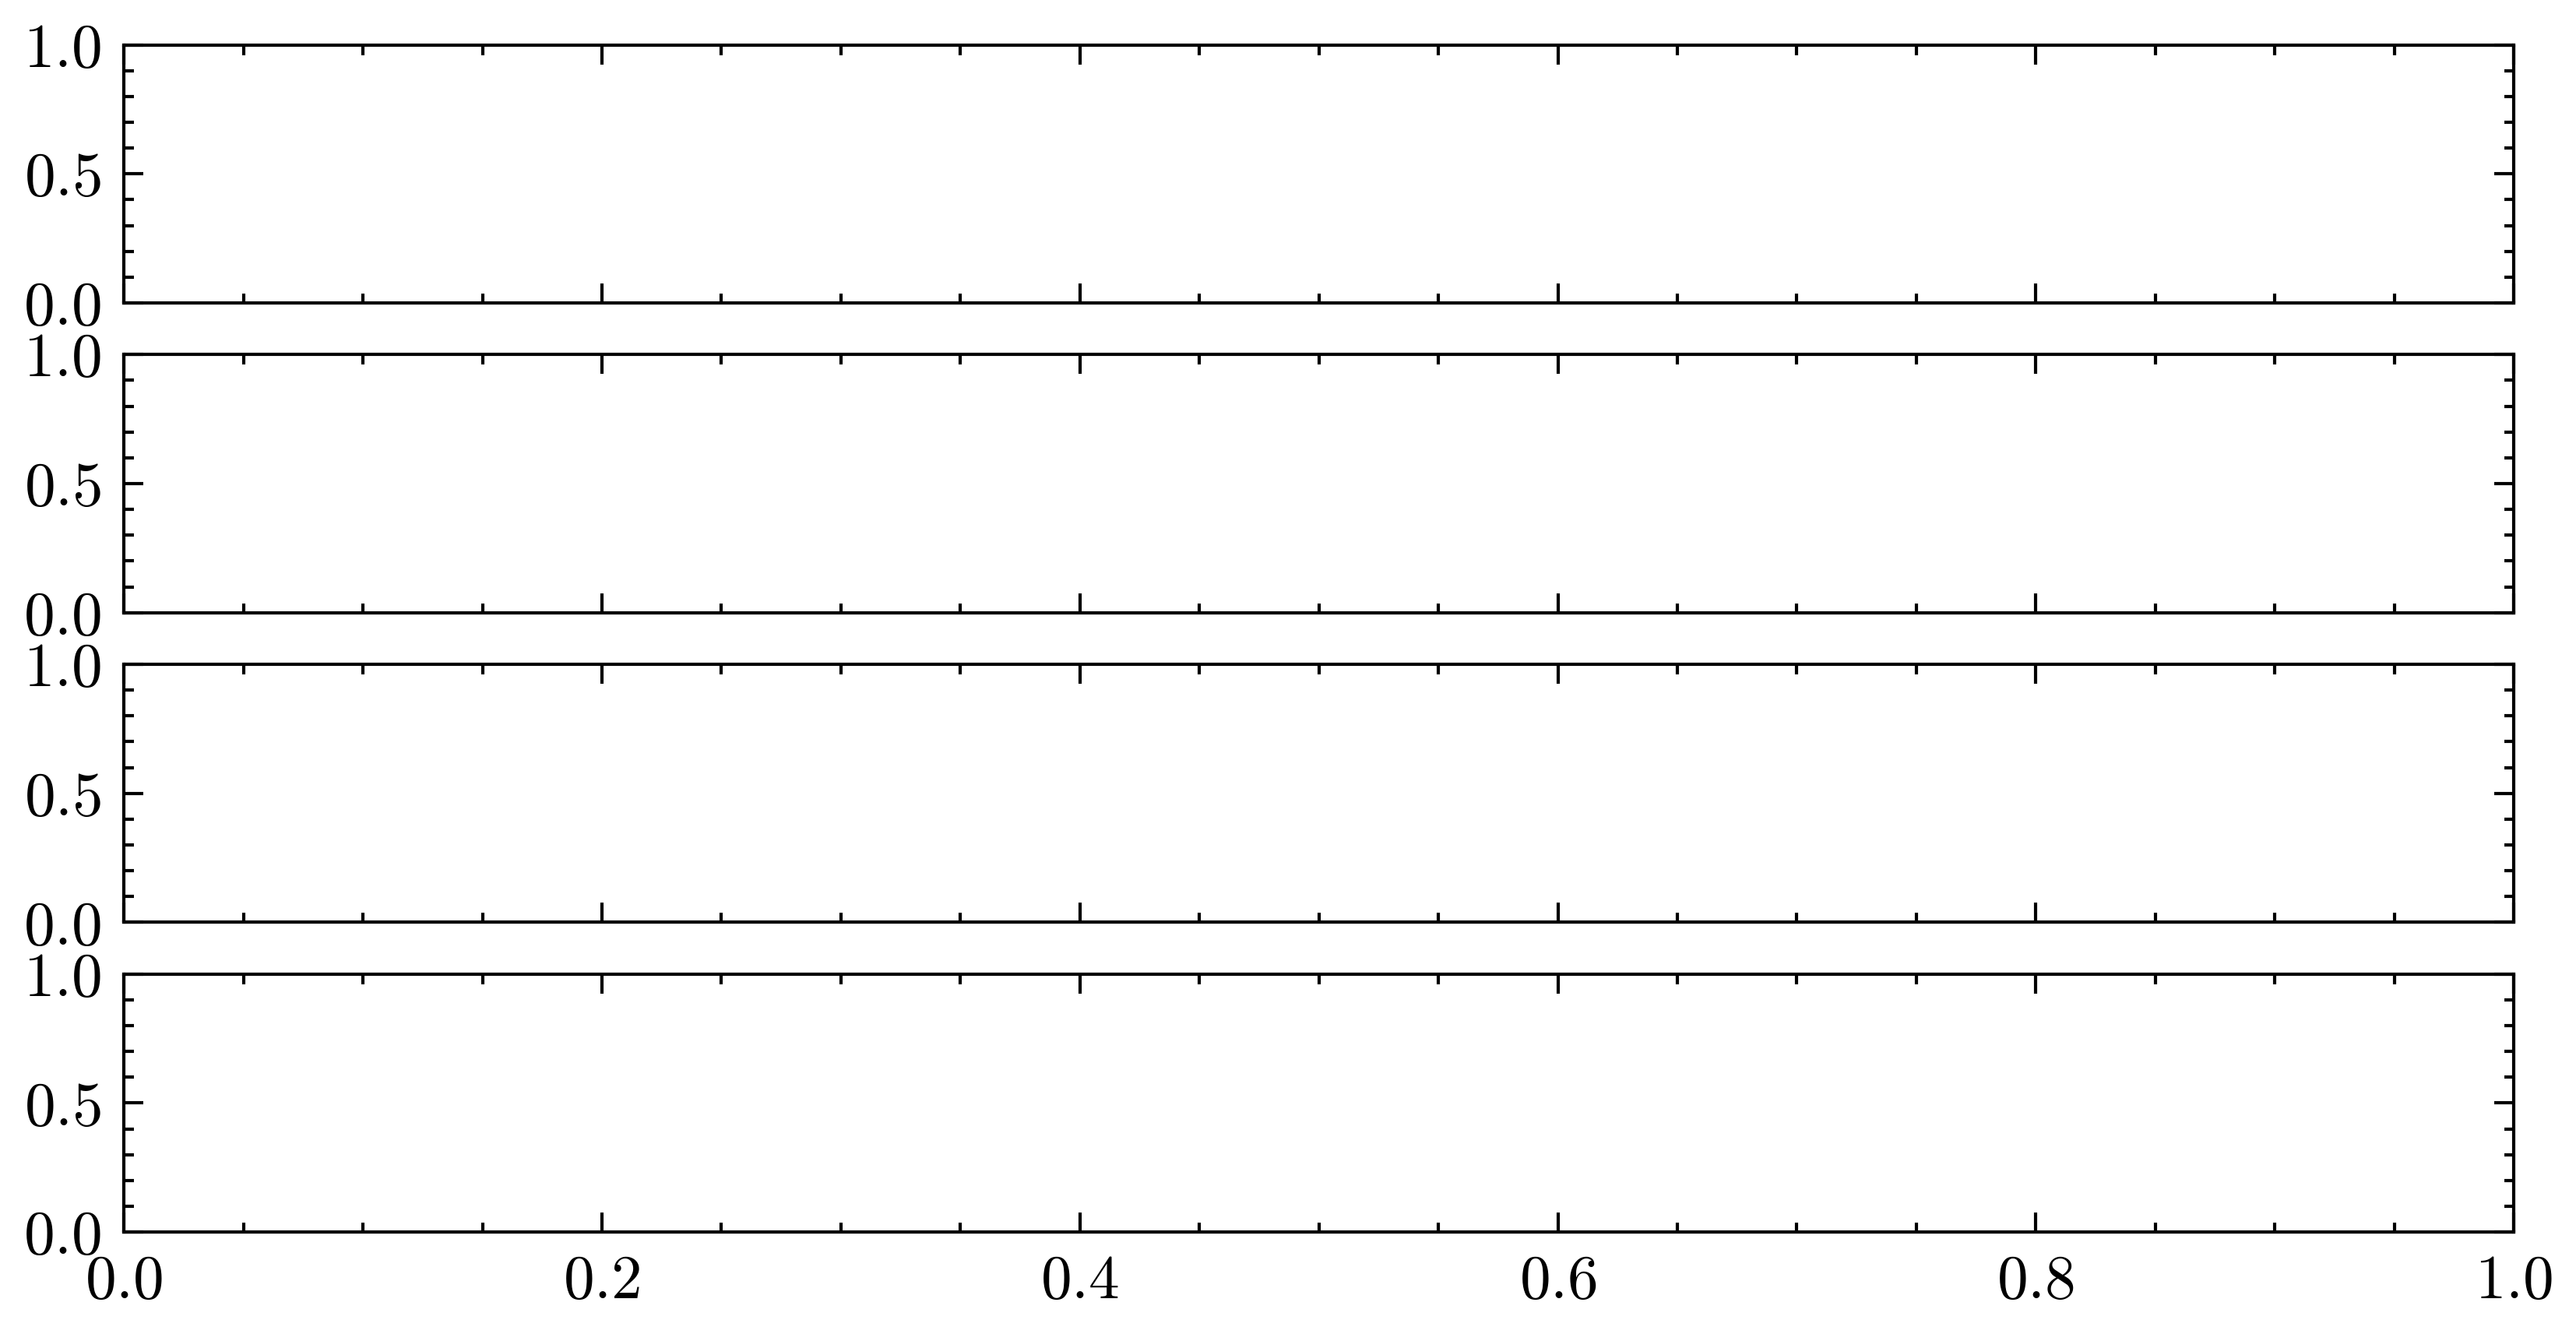

In [4]:
# offline calib
histos = np.loadtxt('peak2.txt')
histos = np.split(histos, len(histos)//4)

peak_times = {
        943: [],
        944: [],
        949: [],
        954: [],
        }

peak_values = {
        943: [],
        944: [],
        949: [],
        954: [],
        }

for i, histo in enumerate(histos):
    station_id = int(histo[:, 0][0])
    daq_time   = histo[:, 1][0]
    timestamp  = int(histo[:, 2][0])
    tube_mask  = histo[:, 3][0]
    iPMT = histo[:, 4]

    if station_id in [945, 972, 948]: continue

    PeakHisto = SdHisto(peak=histo[:, 5:], pmt_mask=[0,0,0,1])
    peak_charge = PeakHisto()
    
    peak_values[station_id].append(peak_charge['peak'][-1])
    peak_times[station_id].append(timestamp)

# monit and plotting results
monit = Monit(2025, 2, range(13,18))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig, axes = plt.subplots(4, 1, sharex=True)
colors = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
for station in [943, 944, 949, 954]:
    
    c = next(colors)

    time = monit('fTime', station)
    rate = monit('f70HzRate', station)
    mip = monit('fPeak', station)[:, -1]

    ax1.plot(plot.to_datetime(time), mip, marker='none', label=station, c=c)
#     ax2.plot(time, rate[:, -1], marker='none', c=c)                   # rate information

    ax1.errorbar(plot.to_datetime(peak_times[station]), [x.n for x in peak_values[station]], 
                 yerr=[x.std_dev for x in peak_values[station]],
                 ls='none', fmt='o', markersize=1, c=c, lw=0.1)
    # ax2.plot(time[15:-14], np.convolve(rate[:, -1], np.ones(30)/30, mode='valid') , marker='none')
    
    min_index = [np.argmin(np.abs(t - time)) for t in peak_times[station]]
    histo_mip = np.array([x.n for x in peak_values[station]])
    diff = (mip[min_index] - histo_mip) / histo_mip

    # 1000s between events w/ running mean over 86 events = 23.89 hours
    # ax2.plot(to_dt(time[min_index])[43:-42], 
    #          np.convolve(diff, np.ones(86)/86, mode='valid'), 
    #          color=c, label=f"{_id}: {np.nanmean(diff)*100:+.1f}%", 
    #          marker='none')

    _sort = np.argsort(min_index)
    ax2.plot(plot.to_datetime(time[min_index][_sort]), diff[_sort], label=f"{station}: {np.nanmean(diff)*100:+.1f}%", marker='none', c=c)

    # for i in range(4):
    #     axes[i].hist(rate[:, i], histtype='step')

ax1.legend(ncol=2)
ax2.legend(ncol=2)

# 10 Hz Rate - 5.36 scaling factor